In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("accidents_2012_to_2014.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464697 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               464697 non-null  object 
 1   Location_Easting_OSGR                        464697 non-null  int64  
 2   Location_Northing_OSGR                       464697 non-null  int64  
 3   Longitude                                    464697 non-null  float64
 4   Latitude                                     464697 non-null  float64
 5   Police_Force                                 464697 non-null  int64  
 6   Accident_Severity                            464697 non-null  int64  
 7   Number_of_Vehicles                           464697 non-null  int64  
 8   Number_of_Casualties                         464697 non-null  int64  
 9   Date                                         464697 non-nul

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number_of_Casualties'>

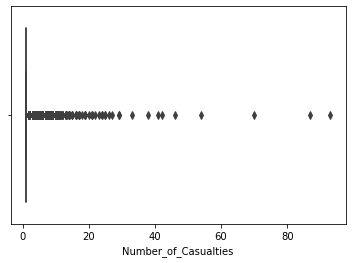

In [4]:
sns.boxplot(df["Number_of_Casualties"])

<AxesSubplot:xlabel='Number_of_Casualties', ylabel='Count'>

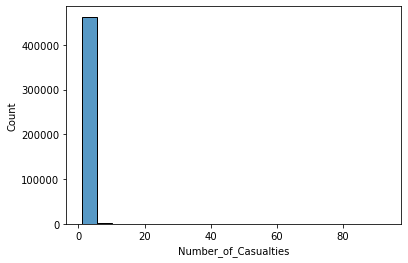

In [5]:
sns.histplot(df["Number_of_Casualties"])

### Aykırı verileri eleme
300 tane aykırı veriyi çıkarttım

In [6]:
df =df.sort_values("Number_of_Casualties",ascending = False).iloc[300:]

<AxesSubplot:xlabel='Number_of_Casualties', ylabel='Count'>

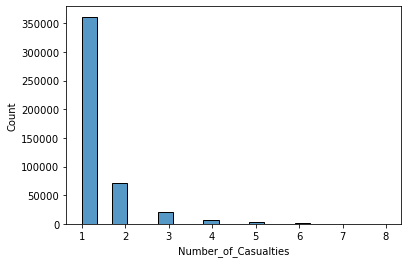

In [7]:
sns.histplot(df["Number_of_Casualties"])

In [8]:
df.loc[df.Weather_Conditions == "Other", "Weather_Conditions"] = "Unknown"
df.Weather_Conditions.value_counts()

Fine without high winds       372915
Raining without high winds     57034
Unknown                        16478
Raining with high winds         7116
Fine with high winds            5007
Snowing without high winds      2708
Fog or mist                     2406
Snowing with high winds          733
Name: Weather_Conditions, dtype: int64

<Figure size 1800x1440 with 0 Axes>

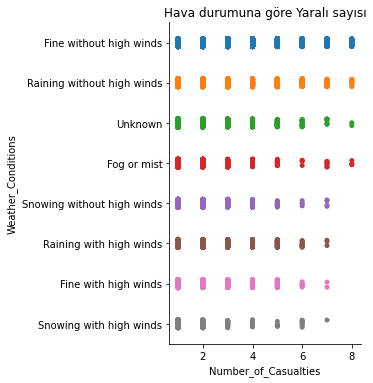

In [9]:
plt.figure(figsize = (25,20))
sns.catplot(x =  "Number_of_Casualties" ,y ="Weather_Conditions" , data=df)

plt.title("Hava durumuna göre Yaralı sayısı")
plt.show()

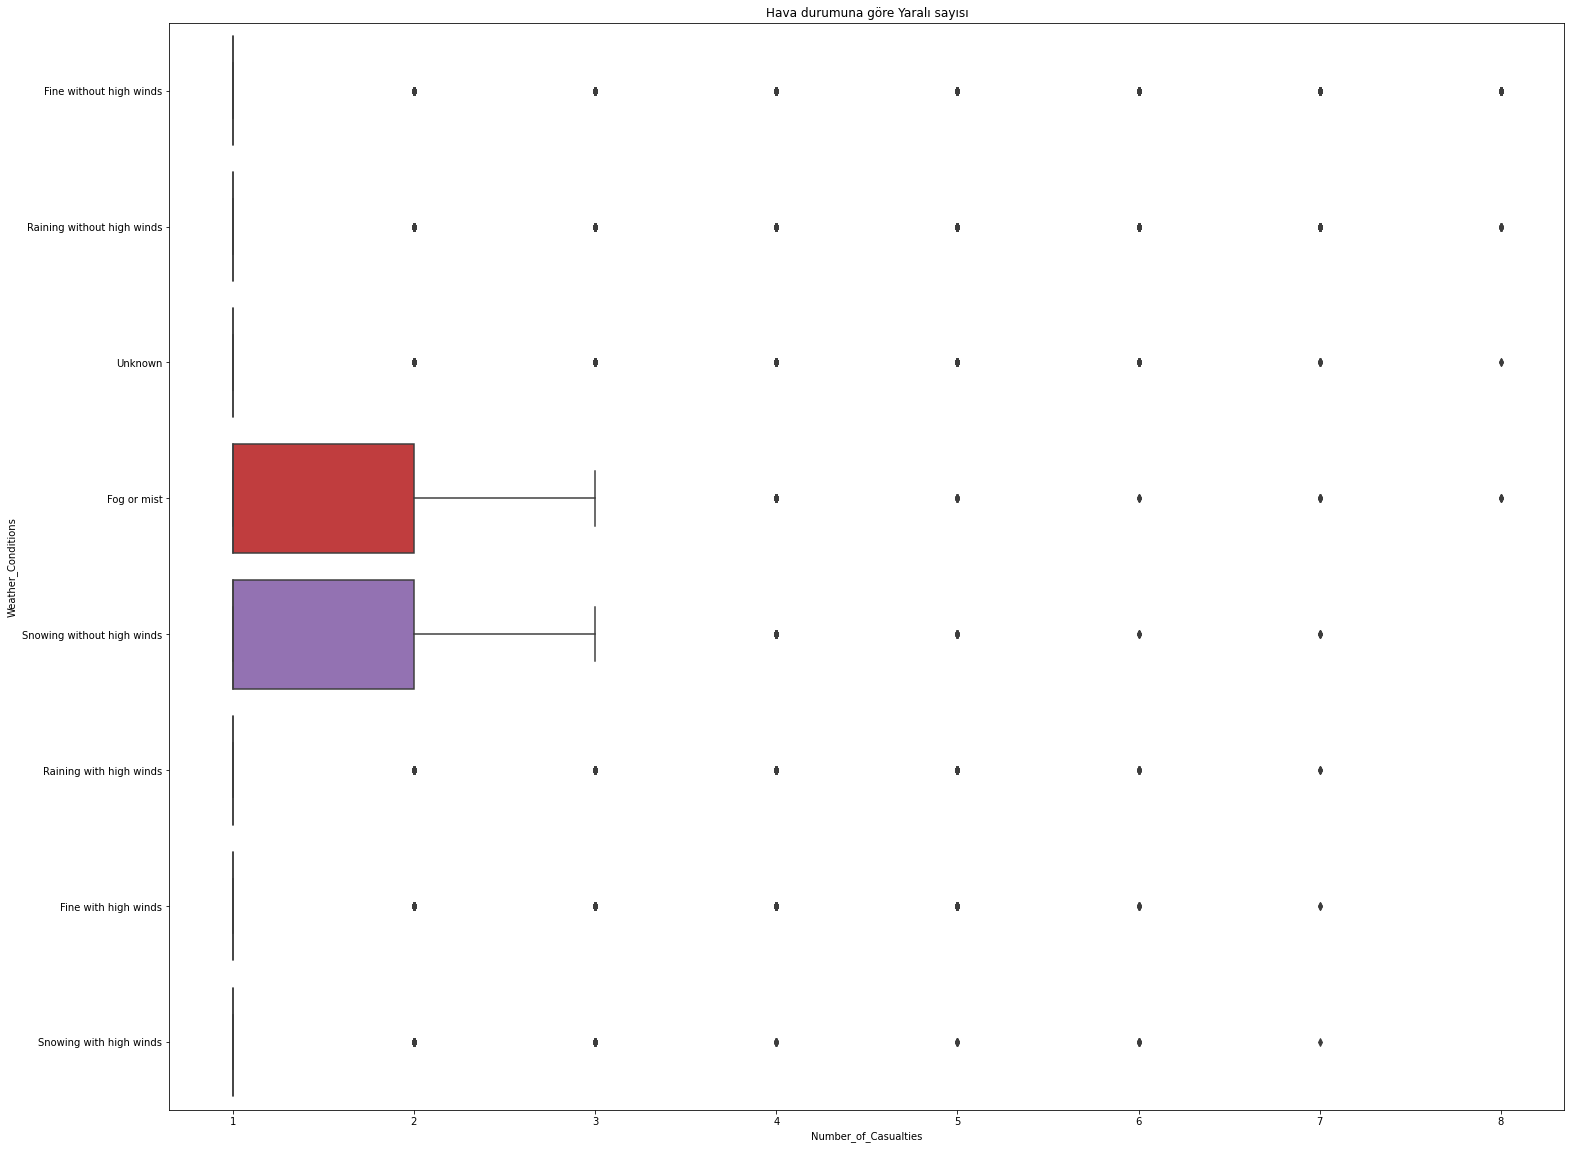

In [10]:
plt.figure(figsize = (25,20))
sns.boxplot(x =  "Number_of_Casualties" ,y ="Weather_Conditions" , data=df)

plt.title("Hava durumuna göre Yaralı sayısı")
plt.show()

In [11]:
df["Time"] = df.Time.str[:-3]

In [12]:
for i in range(0,7):
    df.loc[df.Time =="0"+str(i) ,"Time"] = 3
for i in range(7,10):
    df.loc[df.Time =="0"+str(i) ,"Time"] = 1
df.loc[df.Time =="10" ,"Time"] = 1
df.loc[df.Time =="11" ,"Time"] = 1
for i in range(12,17):
    df.loc[df.Time ==str(i) ,"Time"] = 2
for i in range(17,21):
    df.loc[df.Time ==str(i) ,"Time"] = 1
for i in range(21,25):
    df.loc[df.Time ==str(i) ,"Time"] = 3

### 1 = Trafiğin en yoğun olduğu saatler(07:00-11:00/17:00-21:00)
### 2 = Gün içi
### 3 = Gece

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464397 entries, 424035 to 232348
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               464397 non-null  object 
 1   Location_Easting_OSGR                        464397 non-null  int64  
 2   Location_Northing_OSGR                       464397 non-null  int64  
 3   Longitude                                    464397 non-null  float64
 4   Latitude                                     464397 non-null  float64
 5   Police_Force                                 464397 non-null  int64  
 6   Accident_Severity                            464397 non-null  int64  
 7   Number_of_Vehicles                           464397 non-null  int64  
 8   Number_of_Casualties                         464397 non-null  int64  
 9   Date                                         464397 no

In [14]:
filitre =['Time','Road_Type','Light_Conditions','Carriageway_Hazards','Location_Easting_OSGR','Location_Northing_OSGR',
       'Longitude','Latitude','Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties','Day_of_Week','Local_Authority_(District)','1st_Road_Class',
       '1st_Road_Number', 'Speed_limit','2nd_Road_Class',
       '2nd_Road_Number',
       'Weather_Conditions',
       'Urban_or_Rural_Area', 'Year']

df2 = df.reindex(columns=filitre)

In [15]:
df2 = df2.dropna()

In [16]:
df2.isnull().sum()

Time                          0
Road_Type                     0
Light_Conditions              0
Carriageway_Hazards           0
Location_Easting_OSGR         0
Location_Northing_OSGR        0
Longitude                     0
Latitude                      0
Police_Force                  0
Accident_Severity             0
Number_of_Vehicles            0
Number_of_Casualties          0
Day_of_Week                   0
Local_Authority_(District)    0
1st_Road_Class                0
1st_Road_Number               0
Speed_limit                   0
2nd_Road_Class                0
2nd_Road_Number               0
Weather_Conditions            0
Urban_or_Rural_Area           0
Year                          0
dtype: int64

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464381 entries, 424035 to 232348
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Time                        464381 non-null  object 
 1   Road_Type                   464381 non-null  object 
 2   Light_Conditions            464381 non-null  object 
 3   Carriageway_Hazards         464381 non-null  object 
 4   Location_Easting_OSGR       464381 non-null  int64  
 5   Location_Northing_OSGR      464381 non-null  int64  
 6   Longitude                   464381 non-null  float64
 7   Latitude                    464381 non-null  float64
 8   Police_Force                464381 non-null  int64  
 9   Accident_Severity           464381 non-null  int64  
 10  Number_of_Vehicles          464381 non-null  int64  
 11  Number_of_Casualties        464381 non-null  int64  
 12  Day_of_Week                 464381 non-null  int64  
 13  Local_Aut

In [18]:
df2['Time'] =df2['Time'].astype('int')

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [20]:
df2["Road_Type"]= le.fit_transform(df2["Road_Type"])
df2["Light_Conditions"]= le.fit_transform(df2["Light_Conditions"])
df2["Carriageway_Hazards"]= le.fit_transform(df2["Carriageway_Hazards"])

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464381 entries, 424035 to 232348
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Time                        464381 non-null  int32  
 1   Road_Type                   464381 non-null  int32  
 2   Light_Conditions            464381 non-null  int32  
 3   Carriageway_Hazards         464381 non-null  int32  
 4   Location_Easting_OSGR       464381 non-null  int64  
 5   Location_Northing_OSGR      464381 non-null  int64  
 6   Longitude                   464381 non-null  float64
 7   Latitude                    464381 non-null  float64
 8   Police_Force                464381 non-null  int64  
 9   Accident_Severity           464381 non-null  int64  
 10  Number_of_Vehicles          464381 non-null  int64  
 11  Number_of_Casualties        464381 non-null  int64  
 12  Day_of_Week                 464381 non-null  int64  
 13  Local_Aut

In [22]:
df2.corr()["Number_of_Casualties"].sort_values()

1st_Road_Class               -0.087417
Road_Type                    -0.058601
Accident_Severity            -0.056220
Location_Easting_OSGR        -0.044962
Longitude                    -0.043547
Light_Conditions             -0.035289
2nd_Road_Class               -0.030579
Year                         -0.011123
Carriageway_Hazards          -0.007017
Day_of_Week                   0.001593
2nd_Road_Number               0.003530
1st_Road_Number               0.007854
Police_Force                  0.012565
Local_Authority_(District)    0.020934
Time                          0.029881
Location_Northing_OSGR        0.036244
Latitude                      0.036409
Urban_or_Rural_Area           0.121441
Speed_limit                   0.149009
Number_of_Vehicles            0.253319
Number_of_Casualties          1.000000
Name: Number_of_Casualties, dtype: float64

In [23]:
df2.to_csv("KazaVerileri.csv",index=False)